# <center><b> Decision Tree - Case Study

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br>
  - **7.2** [**Data Scaling**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

**10.** [**Decision Tree (Regression Implementation)**](#Section10)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- A decision tree is a **decision support tool** that uses a **tree-like model** of decisions and their possible consequences.

- It also including chance event outcomes, resource costs, and utility.

- It is widely used **supervised learning** algorithms both for regression and classification tasks.

<center><img src="https://raw.githubusercontent.com/insaid2018/PGPDSAI/main/05%20Term%205%20-%20Machine%20Learning%20Intermediate/01%20Module%201/img/01%20decision%20tree.gif"></center>

- Everyday we need to make **numerous decisions**, many small and a few big.

- Whenever we are in **dilemna**, we are always **taking decisions unconsciously** using the **help** of **decision tree**.

- We take **series of questions** in a nested **IF-THEN statement** and reach to a particular outcome.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- The file daily_weather.csv is a comma-separated file that contains weather data..

- The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.

-  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.


<center><img src="https://i.giphy.com/media/mDYLOFarCMbdoL0c4C/200.webp"width="400" height="300"></center>


<a name = Section21></a>




- So, the primary objectives are to:

  -	Use morning sensor signals as features to predict the humidity at 3pm and whether the humidity will be at higher side.

  - Perform an Exploratory Data Analysis of weather dataset with **visualizations** and **storytelling**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q ydata-profiling                                     # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade ydata-profiling
!pip install -q --upgrade yellowbrick

In [3]:
!pip install --upgrade scikit-learn

<a name = Section33></a>
### **3.3 Importing Libraries**

In [4]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import Ydata Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeRegressor                      # To implement decision tree regression
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import ConfusionMatrixDisplay                   # To plot confusion matrix
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
from sklearn.model_selection import GridSearchCV                    # To find best hyperparamter setting for the algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- Each row in daily weather dataset captures weather data for a separate day.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1095 | 11 | 171.62 kB |

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **number**   | row number                                    |
|02| **air_pressure_9am**      | air pressure averaged over a period from 8:55am to 9:04am                 |
|03| **air_temp_9am**        | 	air temperature averaged over a period from 8:55am to 9:04am                            |
|04| **avg_wind_direction_9am**          | wind direction averaged over a period from 8:55 am to 9:04 am                                |
|05| **avg_wind_speed_9am**           | wind speed averaged over a period from 8:55 am to 9:04am                                  |
|06| **max_wind_direction_9am**           | wind gust direction averaged over a period from 8:55am to 9:04am                                  |
|07| **max_wind_speed_9am**     | wind gust speed averaged over a period from 8:55am to 9:04am |
|08| **rain_accumulation_9am**     | amount of rain accumulated in the 24 hours prior to 9am|
|09| **rain_duration_9am**        | amount of time rain was recorded in the 24 hours prior to 9am                                         |
|10| **relative_humidity_9am**          | relative humidity averaged over a period from 8:55am to 9:04am                                   |
|11| **relative_humidity_3pm**         | relative humidity averaged over a period from 2:55pm to 3:04pm                                         |

In [6]:
# Load the data
data = pd.read_csv(filepath_or_buffer='daily_weather.csv')

# Get the dimesions of data
print('Shape of the dataset:', data.shape)

# Output first 5 data rows
data.head()

Shape of the dataset: (1095, 11)


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [7]:
data.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


**Observations:**


> **air_pressure_9am**:

- Minimum air pressure at 9 am is **907 hectopascals**.
- Average air pressure at 9 am is **918 hectopascals**.

> **rain_accumulation_9am**:
- The **Maximum rain accumulation** is 24.02 millimeters.


> **relative_humidity_3pm**:
- The **minimum humidity** at 3pm is 5 percent.
- while the mean humidity is 35 percent.


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


**Observations:**

- The **data types** of all the features look appropriate.

- There are **missing** values present in all the columns except **relative_humidity_9am** and **relative_humidity_3pm** features.

- **All Features** are of **float type**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [9]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre_Profiling_Report_weather.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- The report shows that there are a **total** of **11 features** and all **11** are **numerical**

- **Avg wind speed** and **max wind speed**, **max wind direction** and **avg wind direction** features have high multicollinearity.

- **air temp** is having a uniform distribution in the dataset.


- There are **no duplicate** rows in the dataset.

- We can observe that **0.3%** of data in cells is **missing**:


- **air_pressure** feature has just **3 missing values**.

- For detailed information, check the **Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Cleaning**

- Now we will perform all the necessary operations that are required to clean and rectify the schema of the dataset.

In [10]:
# Filling the missing values of feature with the median.
data.fillna({'air_pressure_9am': data['air_pressure_9am'].median(), 
             'air_temp_9am': data['air_temp_9am'].median(), 
             'avg_wind_direction_9am': data['avg_wind_direction_9am'].median(),
             'avg_wind_speed_9am': data['avg_wind_speed_9am'].median(),
             'max_wind_direction_9am': data['max_wind_direction_9am'].median(),
             'max_wind_speed_9am': data['max_wind_speed_9am'].median(),
             'rain_accumulation_9am': data['rain_accumulation_9am'].median(),
             'rain_duration_9am': data['rain_duration_9am'].median()}, 
            inplace=True)

# Dropping the number feature
data.drop(labels='number', axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1095 non-null   float64
 1   air_temp_9am            1095 non-null   float64
 2   avg_wind_direction_9am  1095 non-null   float64
 3   avg_wind_speed_9am      1095 non-null   float64
 4   max_wind_direction_9am  1095 non-null   float64
 5   max_wind_speed_9am      1095 non-null   float64
 6   rain_accumulation_9am   1095 non-null   float64
 7   rain_duration_9am       1095 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10)
memory usage: 85.7 KB


<a name = Section53></a>
### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

In [12]:
post_profile=ProfileReport(df=data)
post_profile.to_file(output_file='Post_Profiling_Report_weather.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- You can compare the two reports, i.e **Pre Profiling Report.html** and **Post Profiling Report.html**.

- Observations in Post Profiling Report.html:

  - In the Dataset info, **Total Missing** = **0.0%**

  - Number of **features** = **10**

  - A column named number was dropped which had very little effect.

  - All the missing values were replaced by median.

  - For detailed information, check the **Post Profiling Report.html** file.

- We can now begin the Exploratory Data Analysis.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question:** what is the distribution of our dependent feature?</h4>

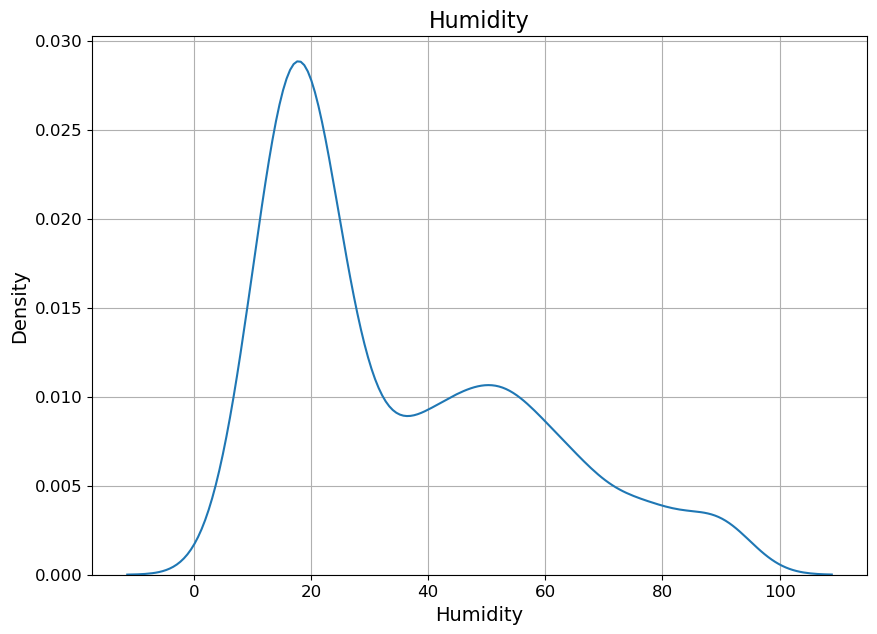

In [13]:
# Create a figure of 10 x 7 inches
fig = plt.figure(figsize=(10, 7))

# Plot a kde plot on relative_humidity_3pm using sns.kdeplot
sns.kdeplot(x = (data['relative_humidity_3pm']))

# Set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.xlabel(xlabel='Humidity', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Humidity', size=16)

# Put a grid
plt.grid(True)

# Display the plot
plt.show()

**<h4>Question:** Does the temperature have any relation with humidity?</h4>

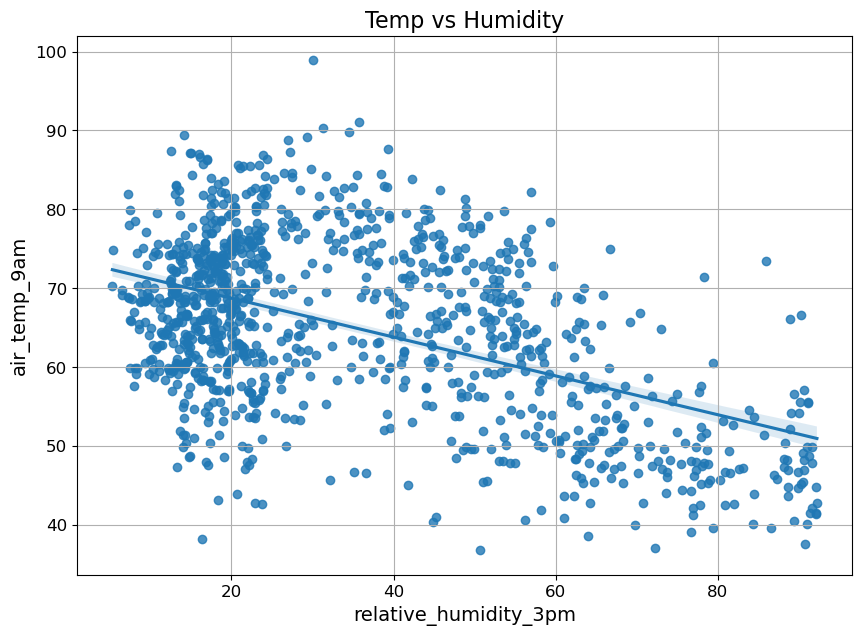

In [14]:
# Create a figure of 10 x 7 inches
fig = plt.figure(figsize=(10, 7))

# Plot a regression plot using sns.regplot between relative_humidity_3pm and air_temp_9am features.
sns.regplot(data=data, x='relative_humidity_3pm', y='air_temp_9am')

# Set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.ylabel(ylabel='air_temp_9am', size=14)
plt.xlabel(xlabel='relative_humidity_3pm', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Temp vs Humidity', size=16)

# Put a grid
plt.grid(True)

# Display the plot
plt.show()

**Observations**:

- There is some **skewness** in our target and it is a **postive** skewness.

- We can see that there is a **negative** relation between **Temperature** and **humidity**.

**Note:** These are few question we need to analyze before moving further and if you want to dig deeper into this, feel free to do so...

<a name = Section7></a>

---
# **7. Post Data Processing**
---



In [15]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


<a name = Section73></a>
### **7.1 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [16]:
X = data.drop(labels=['relative_humidity_3pm'], axis=1)
y = data['relative_humidity_3pm']
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (733, 9)
y_train shape:  (733,)
X_test shape:  (362, 9)
y_test shape:  (362,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Decision Tree model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Precision**, **Recall** and **Accuracy** scores.


In [17]:
# Instantiate a decision tree classifier
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = dtr.predict(X_train)
y_test_pred_count = dtr.predict(X_test)

# R^2 results on model
print('Training R^2 Squared:', dtr.score(X_train, y_train))
print('Testing R^2 Squared:', dtr.score(X_test, y_test))

Training R^2 Squared: 1.0
Testing R^2 Squared: 0.7215130667470085


<a name = Section10></a>

# **10. Decision Tree (Classification Implementation)**

In [18]:
data['high_humidity_label'] = (data['relative_humidity_3pm'] > 24.99) * 1
print(data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      0
15      0
16      1
17      0
18      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      0
34      0
35      1
36      1
37      1
38      1
39      0
40      1
41      0
42      1
43      1
44      0
45      1
46      1
47      0
48      0
49      0
50      0
51      1
52      0
53      0
54      0
55      1
56      1
57      1
58      0
59      1
60      0
61      1
62      1
63      1
64      0
65      0
66      0
67      0
68      1
69      0
70      0
71      0
72      0
73      1
74      1
75      1
76      0
77      0
78      1
79      1
80      1
81      1
82      1
83      0
84      1
85      1
86      0
87      0
88      0
89      1
90      0
91      1
92      0
93      0
94      1
95      0
96      0
97      0
98      1
99      1


In [19]:
X = data.drop(labels=['relative_humidity_3pm','high_humidity_label'], axis=1)
y = data['high_humidity_label']
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (733, 9)
y_train shape:  (733,)
X_test shape:  (362, 9)
y_test shape:  (362,)


<a name = Section8></a>

---
# **Model Development & Evaluation**
---

- In this section we will **develop Decision Tree model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Precision**, **Recall** and **Accuracy** scores.

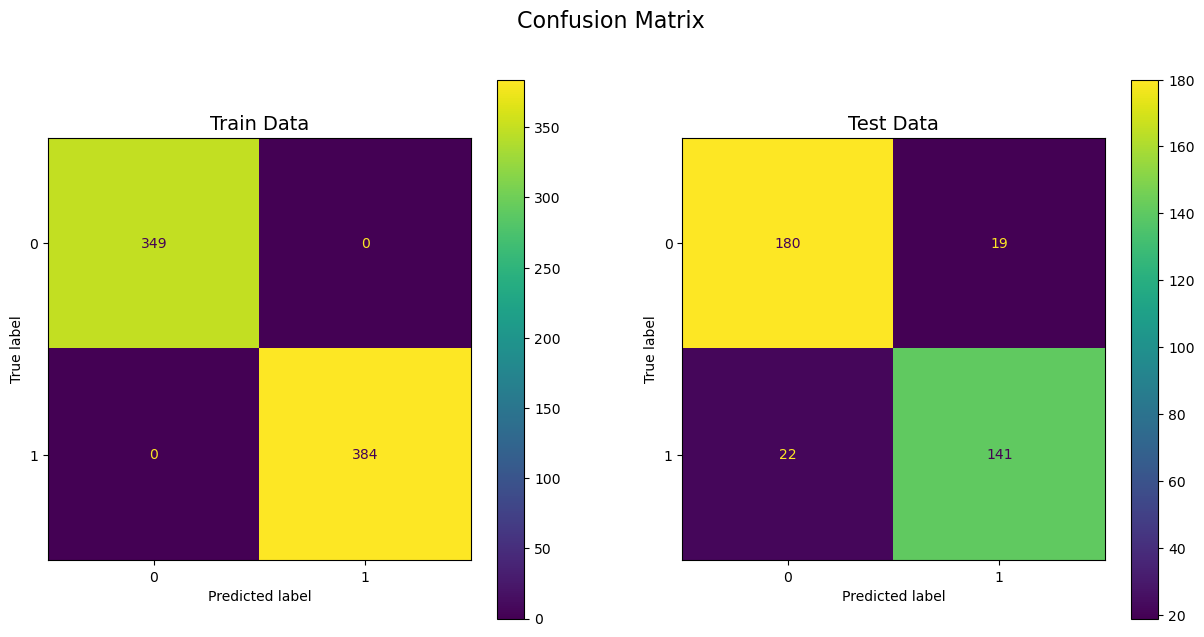

In [20]:
# Instantiate a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = dtc.predict(X_train)
y_test_pred_count = dtc.predict(X_test)

#Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
ConfusionMatrixDisplay.from_estimator(dtc, X_train, y_train,values_format='.5g',cmap='viridis', ax=ax1)
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test,values_format='.5g',cmap='viridis', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(False)
ax2.grid(False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [21]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       384

    accuracy                           1.00       733
   macro avg       1.00      1.00      1.00       733
weighted avg       1.00      1.00      1.00       733

                    Testing Report           
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       199
           1       0.88      0.87      0.87       163

    accuracy                           0.89       362
   macro avg       0.89      0.88      0.89       362
weighted avg       0.89      0.89      0.89       362



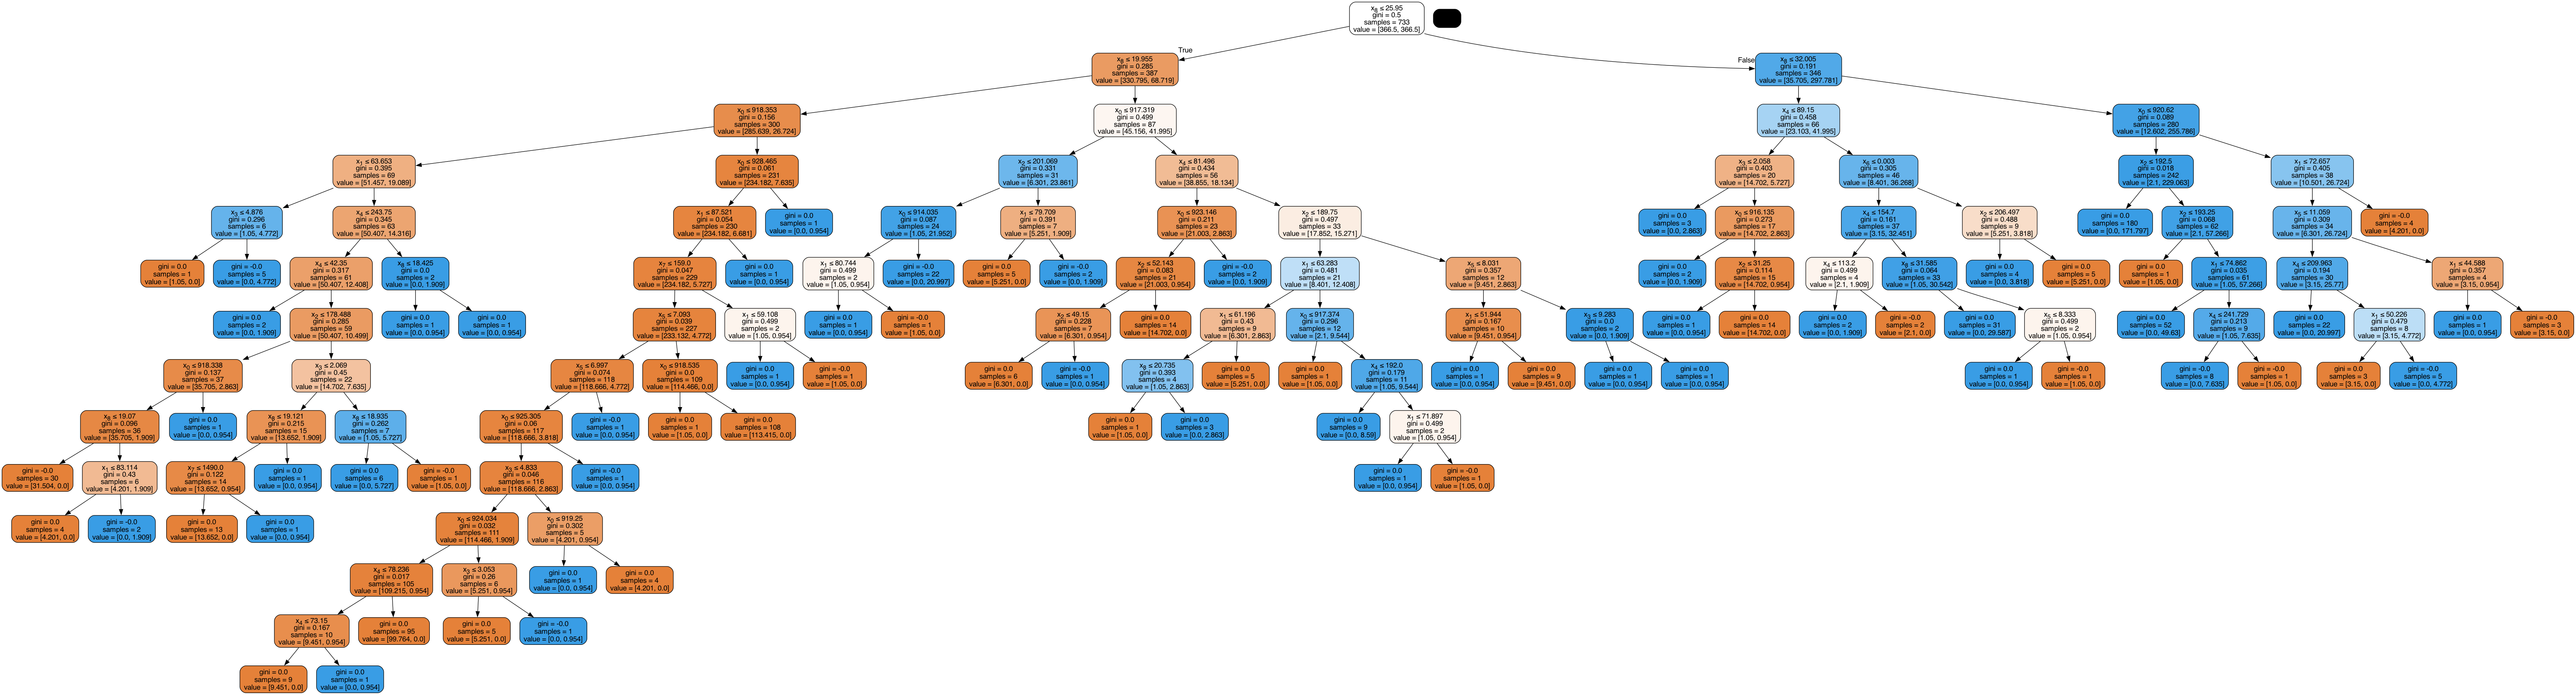

In [22]:
# Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtc,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           )

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())

# **Conclusion**
- We can clearly see that **decision tree** is **overfitting** over the **training set**.

- You can **either** **prune** the **tree** or use **better algorithm** such as **Random Forest** to improve the results of the model.

- & That's it. We hope you get the idea of Decision Tree in terms of implementation.